In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
ch89dg = pd.read_csv('../cleaned_data/CH89DG.csv')
ch89m = pd.read_csv('../cleaned_data_descriptive/ch89m.csv')
ch89pru = pd.read_csv('../cleaned_data/ch89pru.csv')
ch89q = pd.read_csv('../cleaned_data/ch89q.csv')
ch89all = pd.read_csv('../cleaned_data_descriptive/89all.csv')

In [11]:
ch89all.shape

(621, 643)

In [12]:
ch89dg_full = pd.read_csv('../data/CH89DG.csv')

In [13]:
ch89dg_full.head(10)

,County,Sex,Xiang,D001,D002,D003,D004,D005,D006,D007,...,D158,D159,D160,D161,G001,G002,G003,G004,G005,
0,AA,M,1,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN
1,AA,M,2,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN
2,AA,M,3,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN
3,AA,F,1,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN
4,AA,F,2,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN
5,AA,F,3,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN
6,AA,T,1,2678,87.2,65.8,397,29.8,9.9,2.7,...,0.011,0.017,0.013,0.052,.,.,.,.,.,NaN
7,AA,T,2,2637,69.8,65.0,432,23.2,9.8,2.4,...,0.021,0.027,0.017,0.024,.,.,.,.,.,NaN
8,AA,T,3,2658,78.5,65.4,415,26.5,9.9,2.6,...,0.016,0.022,0.015,0.038,31.1,121.4,50,1,4,NaN
9,AB,M,1,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,NaN


In [14]:
ch89all.head()

,Unnamed: 0,county,sex,xiang,q001,q002,q003,q004,q005,q006,...,m110_CONGENITa,m111_NTDa,m112_CONGENHDa,m113_PERINATa,m114_LOWBTHWTa,m115_BTHTRAUMa,m116_RDSa,m117_NEOTETANa,m118_MALNUTRIa,m119_DROWNa
0,0,AA,M,1,NaN,NaN,NaN,NaN,3.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AA,M,2,NaN,NaN,NaN,NaN,3.3,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AA,M,3,NaN,NaN,NaN,NaN,3.3,0.0,...,3.84,0.46,1.84,7.83,2.61,2.0,0.77,0.0,0.0,4.61
3,3,AA,F,1,NaN,NaN,NaN,NaN,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AA,F,2,NaN,NaN,NaN,NaN,12.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ch89all.dropna(how = 'all', axis = 1, inplace = True)
ch89all.shape

(621, 643)

In [16]:
ch89all.isna().sum().value_counts()

415    207
138    143
414    111
420     57
423     44
141     19
554      8
166      6
447      6
176      6
552      6
444      5
142      3
555      3
0        3
161      2
144      2
419      2
427      2
175      1
140      1
159      1
145      1
9        1
416      1
480      1
174      1
dtype: int64

In [17]:
ch89m[(ch89m['sex'] == 'T') & (ch89m['xiang'] == 3)].shape

(67, 123)

In [18]:
ch89all.shape

(621, 643)

In [19]:
dtables = [ch89dg, ch89m, ch89pru, ch89q]

for table in dtables:
    table.drop('Unnamed: 0',axis =1, inplace=True)
    table.loc[table['county'].isna(), 'county'] = 'NA'
dtables[1]
dtables[1][(dtables[1]['sex'] == 'T') & (dtables[1]['xiang'] == 3)].shape
sbat = pd.merge(ch89m, ch89dg, 
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])
for table in dtables[2:]:
    sbat = pd.merge(sbat, table, 
               how='left',
               left_on=['county', 'sex', 'xiang'],
               right_on=['county', 'sex', 'xiang'])

In [20]:
sbat_total = sbat[(sbat['sex'] == 'T')].dropna(how = 'all')
sbat_total = sbat_total.dropna(how = 'all', axis = 1)
sbat_total = sbat_total.drop(columns = ['xiang', 'sex', 'county'])
sbat_total.corr().abs()['m005_ALL35_69'].sort_values(ascending = False)[0:50]

m005_ALL35_69     1.000000
m008_MEDICALc     0.991446
m006_ALL70_79     0.684645
m065_STROKEc      0.659997
m059_ALLVASCc     0.652527
m072_COPDc        0.541293
m069_ALLRESPc     0.532412
m010_NONMEDc      0.519156
m028_OESOPHCAc    0.509644
m023_ALLCAc       0.498672
m067_VASC-STRc    0.490863
q123              0.476271
r009              0.466045
m018_OTHERTBc     0.465759
q099              0.465118
q106              0.444867
q100              0.432793
m061_RHEUMHDc     0.432319
q023              0.429602
m100_SUICIDEc     0.425929
m066_VASC_STRb    0.422327
p030              0.409762
g003              0.403162
m056_EPILEPSYb    0.378775
m058_ALLVASCb     0.377959
q020              0.376874
m077_INTESTOBc    0.371778
d152              0.368573
m024_MOUTHCAc     0.363706
m094_ACCIDENTc    0.359950
q101              0.359509
m060_RHEUMHDb     0.356418
m099_SUICIDEb     0.354957
p001              0.354115
m003_ALL15_34     0.354053
m063_IHDc         0.352792
m027_OESOPHCAc    0.351446
d

<AxesSubplot:xlabel='d034', ylabel='m005_ALL35_69'>

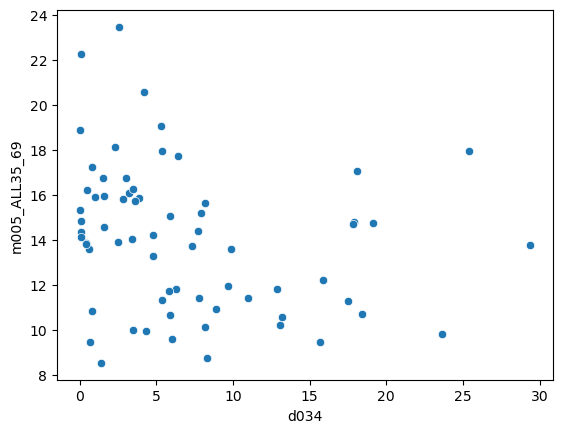

In [21]:
sns.scatterplot(data = sbat_total, x = 'd034', y = 'm005_ALL35_69')

<AxesSubplot:xlabel='d001', ylabel='m005_ALL35_69'>

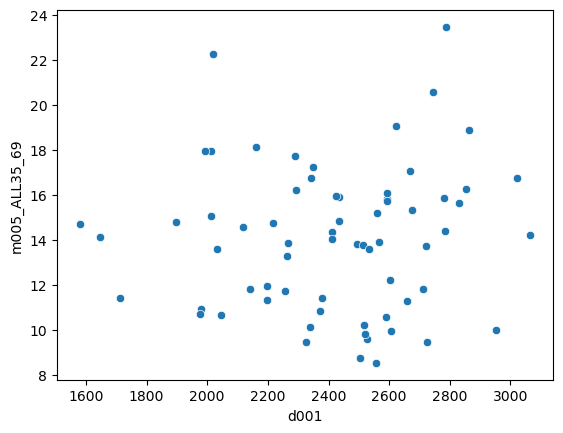

In [22]:
sns.scatterplot(data = sbat[(sbat['sex'] == 'T')], x = 'd001', y = 'm005_ALL35_69')

In [23]:
sbat[(sbat['sex'] == 'T') & (sbat['xiang'] == 3)].shape

(67, 642)

In [24]:
# drop columns with all NA
sbat_t = sbat[(sbat['sex'] == 'T') & (sbat['xiang'] == 3)]
sbat_t.dropna(axis = 1, how = 'all', inplace = True)
sbat_f = sbat[(sbat['sex'] == 'F') & (sbat['xiang'] == 3)]
sbat_f.dropna(axis = 1, how = 'all', inplace = True)
sbat_m = sbat[(sbat['sex'] == 'M') & (sbat['xiang'] == 3)]
sbat_m.dropna(axis = 1, how = 'all', inplace = True)
sbat_t.drop(columns = ['sex','county','xiang'], inplace = True)
sbat_m.drop(columns = ['sex','county','xiang'], inplace = True)
sbat_f.drop(columns = ['sex','county', 'xiang'], inplace = True) 

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/2583018306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbat_t.dropna(axis = 1, how = 'all', inplace = True)
/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/2583018306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbat_f.dropna(axis = 1, how = 'all', inplace = True)
/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/2583018306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [25]:
sbat_f.corr().abs()["m005_ALL35_69"].sort_values(ascending = False)[10:20]

q106              0.539275
m061_RHEUMHDc     0.523211
q063              0.501580
m063_IHDc         0.493134
m018_OTHERTBc     0.492690
q099              0.491622
q123              0.481440
m075_PEPULCERc    0.479946
q101              0.472929
p002              0.469368
Name: m005_ALL35_69, dtype: float64

In [26]:
import seaborn as sns

In [27]:
sbat

,county,sex,xiang,m001_ALL0_4,m002_ALL5_14,m003_ALL15_34,m004_ALL0_34,m005_ALL35_69,m006_ALL70_79,m007_MEDICALb,...,q238,q239,q240,q241,q242,q243,q244,q245,q246,q247
0,AA,M,3,4.39,74.75,89.04,134.95,15.08,104.05,77.25,...,NaN,NaN,NaN,NaN,31.7,1.11,1.39,1.05,16.2,1.01
1,AA,F,3,2.83,68.53,60.71,94.76,7.49,50.53,58.71,...,11.8,90.2,84.3,4.9,30.2,1.06,1.38,1.04,15.7,0.98
2,AA,T,3,3.61,71.64,74.88,114.86,11.29,77.29,67.98,...,NaN,NaN,NaN,NaN,30.9,1.09,1.38,1.04,15.9,1.00
3,AB,M,3,4.07,43.33,94.72,124.64,15.37,92.53,81.23,...,NaN,NaN,NaN,NaN,27.0,1.03,1.32,1.04,15.3,0.96
4,AB,F,3,3.20,32.98,77.51,99.40,8.27,57.23,66.20,...,5.0,92.9,49.1,8.1,27.9,1.09,1.33,1.05,15.6,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,XB,F,3,17.07,91.35,259.99,418.57,13.94,126.59,359.37,...,3.5,96.5,5.9,0.0,26.6,1.04,1.26,0.98,16.8,1.08
197,XB,T,3,16.41,85.92,254.12,404.19,18.88,140.51,327.55,...,NaN,NaN,NaN,NaN,26.9,1.04,1.26,0.99,16.8,1.07
198,YA,M,3,3.82,167.69,131.09,177.34,24.37,58.51,111.51,...,NaN,NaN,NaN,NaN,30.9,1.05,1.31,0.98,17.7,1.09
199,YA,F,3,3.45,134.49,77.99,132.34,11.52,39.98,91.83,...,6.5,97.2,25.7,3.1,30.5,1.03,1.31,0.97,17.6,1.09


###### plots

In [28]:
sbat_f.corr().abs()["m086_RENALc"].sort_values(ascending = False)[0:20]

m086_RENALc       1.000000
m083_GENITURc     0.988578
m085_GENITURfc    0.988578
m012_INFECTc      0.610225
m074_DIGESTIVc    0.585629
m014_INTESTINc    0.512106
m016_PULMTBc      0.510552
m079_CIRRHOSc     0.497429
m007_MEDICALb     0.444641
m073_DIGESTIVb    0.437328
p007              0.431734
m075_PEPULCERc    0.431416
m027_OESOPHCAc    0.413074
m011_INFECTb      0.397128
m109_ALLGIa       0.391024
m076_ENTCOLc      0.388448
m117_NEOTETANa    0.387233
m106_MEDICALa     0.384599
m078_CIRRHOSb     0.384514
q186              0.380683
Name: m086_RENALc, dtype: float64

In [29]:
sbat_mf = sbat[(sbat['sex']=='M')|(sbat['sex']=='F')]

In [30]:
sbat_mf.shape

(134, 642)

In [31]:
sbat_mf['d008'].isna().sum()

134

[Text(0.5, 1.0, 'Renal cancer mortalities by plasma total protein'),
 Text(0.5, 0, 'Total plasma protein g/dl'),
 Text(0, 0.5, 'Mortalities per 100,000')]

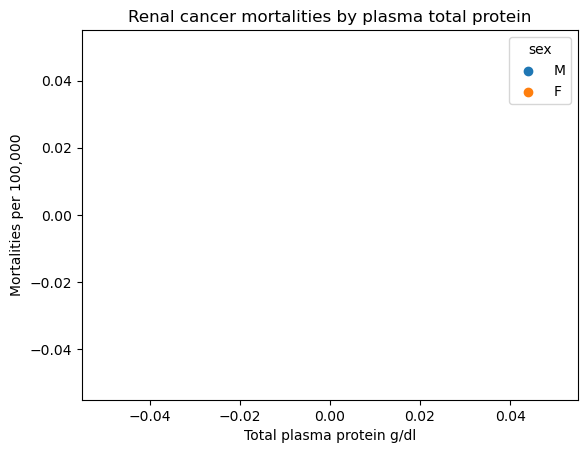

In [32]:
sns.scatterplot(data = sbat_mf, x = 'd007', 
    y = 'm086_RENALc', hue = 'sex').set(
    title = 'Renal cancer mortalities by plasma total protein',
    xlabel = 'Total plasma protein g/dl',
    ylabel = 'Mortalities per 100,000'
    )

[Text(0.5, 1.0, 'Renal cancer mortalities by plasma total protein'),
 Text(0.5, 0, 'Total plasma protein g/dl'),
 Text(0, 0.5, 'Mortalities per 100,000')]

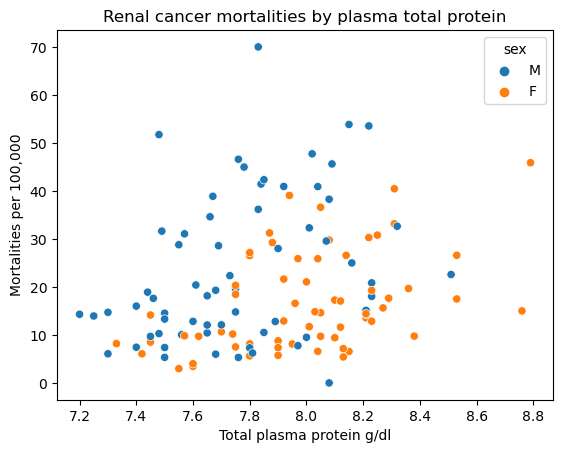

In [33]:
sns.scatterplot(data = sbat_mf, x = 'p007', 
    y = 'm086_RENALc', hue = 'sex').set(
    title = 'Renal cancer mortalities by plasma total protein',
    xlabel = 'Total plasma protein g/dl',
    ylabel = 'Mortalities per 100,000'
    )

[Text(0.5, 1.0, 'Medical mortalities by weazy chest percentage'),
 Text(0.5, 0, 'Pct. with an often weazy chest'),
 Text(0, 0.5, 'Mortalities per 1,000')]

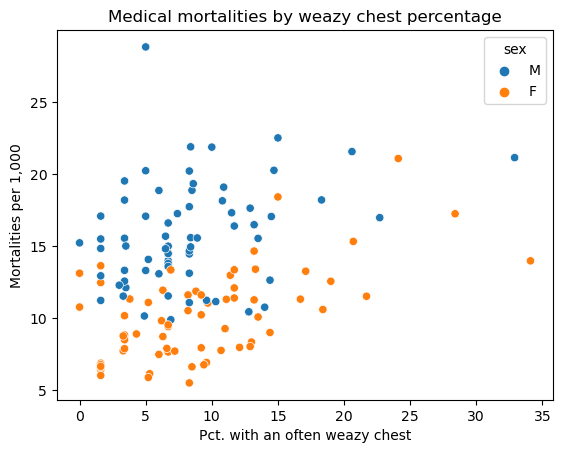

In [34]:
sns.scatterplot(data = sbat_mf, x = 'q106', 
    y = 'm008_MEDICALc', hue = 'sex').set(
    title = 'Medical mortalities by weazy chest percentage',
    xlabel = 'Pct. with an often weazy chest',
    ylabel = 'Mortalities per 1,000'
            )

m021_SCHISTOc investigation

In [35]:
sbat_mf.corr().abs()["m021_SCHISTOc"].sort_values(ascending = False)[0:20]

m021_SCHISTOc     1.000000
q095              0.934449
m029_COLRECCAc    0.563044
q201              0.531621
q179              0.461917
q208              0.412624
q176              0.361137
m019_VIRALHEPb    0.358189
m032_PANCRSCAc    0.355816
q200              0.344766
r018              0.328937
m020_VIRALHEPc    0.321509
q194              0.317140
r013              0.310264
q245              0.308411
r022              0.307662
q172              0.306587
r004              0.300077
u029              0.298886
q142              0.298079
Name: m021_SCHISTOc, dtype: float64

In [36]:
import matplotlib.pyplot as plt

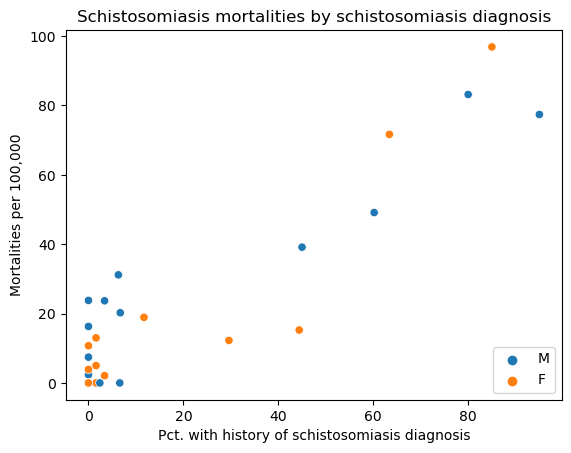

In [37]:
sns.scatterplot(data = sbat_mf, x = 'q095', 
    y = 'm021_SCHISTOc', hue = 'sex').set(
    title = 'Schistosomiasis mortalities by schistosomiasis diagnosis',
    xlabel = 'Pct. with history of schistosomiasis diagnosis',
    ylabel = 'Mortalities per 100,000',
            )
plt.legend(loc='lower right')


In [38]:
sbat_f.corr().abs()["m021_SCHISTOc"].sort_values(ascending = False)[0:20]

m021_SCHISTOc     1.000000
q095              0.940496
m029_COLRECCAc    0.654416
q201              0.531621
m032_PANCRSCAc    0.479852
m098_DROWNc       0.438989
q208              0.412624
q013              0.391114
r019              0.390026
q176              0.350310
r004              0.349492
m042_LEUKEMIAc    0.346484
q200              0.344766
m020_VIRALHEPc    0.341744
q245              0.340942
r018              0.336943
q194              0.317140
q167              0.309178
r003              0.306859
r001              0.305683
Name: m021_SCHISTOc, dtype: float64

[Text(0.5, 1.0, 'Medical mortalities by weazy chest percentage'),
 Text(0.5, 0, 'Pct. with an often weazy chest'),
 Text(0, 0.5, 'Mortalities per 1,000')]

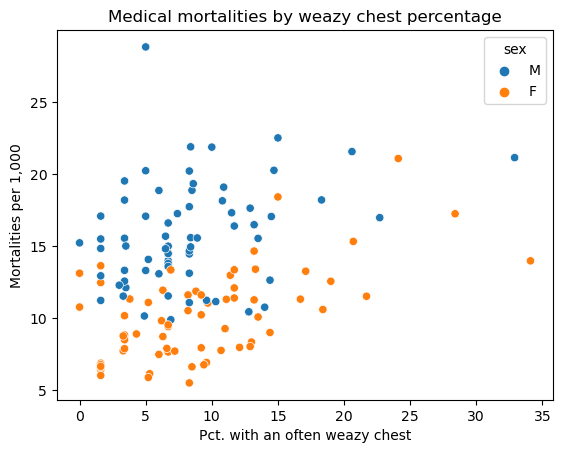

In [39]:
sns.scatterplot(data = sbat_mf, x = 'q106', 
    y = 'm008_MEDICALc', hue = 'sex').set(
    title = 'Medical mortalities by weazy chest percentage',
    xlabel = 'Pct. with an often weazy chest',
    ylabel = 'Mortalities per 1,000'
            )

In [40]:
sbat_t.shape

(67, 521)

In [41]:
sbat.shape

(201, 642)

In [42]:
na_counts_t = sbat_t.isna().sum().sort_values(ascending = False)
na_counts_f = sbat_f.isna().sum().sort_values(ascending = False)
na_counts_m = sbat_m.isna().sum().sort_values(ascending = False)

# na_counts[na_counts.values==69].index
na_counts_t, na_counts_f, na_counts_m

(m099_SUICIDEb     9
 m119_DROWNa       9
 m101_HOMICIDEb    9
 m097_DROWNb       9
 m095_ROADACCb     9
                  ..
 d096              0
 d095              0
 d094              0
 d093              0
 q247              0
 Length: 521, dtype: int64,
 q133              14
 m093_ACCIDENTb     9
 m095_ROADACCb      9
 m101_HOMICIDEb     9
 m097_DROWNb        9
                   ..
 r001               0
 p048               0
 p046               0
 p044               0
 q247               0
 Length: 370, dtype: int64,
 m101_HOMICIDEb    9
 m097_DROWNb       9
 m095_ROADACCb     9
 m093_ACCIDENTb    9
 m119_DROWNa       9
                  ..
 r001              0
 r002              0
 r003              0
 r004              0
 q247              0
 Length: 340, dtype: int64)

###### merge tables

mortality_list = pd.read_csv('./cleaned_data_descriptive/mortality_list.csv')

m_targets = pd.read_csv('./cleaned_data_descriptive/mortality_list.csv')
m_targets = m_targets['mortality_targets']
list(m_targets.values)

questions = pd.read_csv('./cleaned_data_descriptive/questions_list.csv')
questions = questions['question']
questions
m_targets = pd.read_csv('./cleaned_data_descriptive/mortality_list.csv')
m_targets = m_targets['mortality_targets']
dg_to_keep = ['d005','d006','d007','d008','d009', 
               'd012','d013','d014','d015','d016', 
               'd028','d029','d030','d031','d032','d033','d034','d035','d036', 
               'd037','d038','d039','d040', 
               'd041','d042','d043','d044','d045','d046', 
               'd047','d048','d049','d050','d051','d052', 
               'g001','g002','g003','g004','g005']
ch89q_model = ch89q.loc[:,list(questions) + ['county', 'sex', 'xiang'] ]
ch89dg_model = ch89dg.loc[:,list(dg_to_keep) + ['county', 'sex', 'xiang']]
ch89m_model = ch89m #.loc[:,list(m_targets.values) + ['county', 'sex', 'xiang']] 

bat = pd.merge(ch89q_model, ch89dg_model, 
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])
bat = pd.merge(bat, ch89pru,
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])
bat = pd.merge(bat, ch89m_model,
               how='left',
              left_on=['county', 'sex', 'xiang'],
              right_on=['county', 'sex', 'xiang'])


bat.shape


bat[(bat['sex'] == 'T') & (bat['xiang'] == 3)].isna().sum().sort_values(ascending = False).value_counts()

##### Principal Component Analysis
source: GA Lesson 41 delivered by James Larkin

###### PCA on the 'total' rows

In [44]:
mortalities_t = [col for col in sbat_t.columns if col.startswith('m')]
predictors_t = [col for col in sbat_t.select_dtypes(exclude='object').columns if not col.startswith('m')]
mortalities_f = [col for col in sbat_f.columns if col.startswith('m')]
predictors_f = [col for col in sbat_f.select_dtypes(exclude='object').columns if not col.startswith('m')]
mortalities_m = [col for col in sbat_m.columns if col.startswith('m')]
predictors_m = [col for col in sbat_m.select_dtypes(exclude='object').columns if not col.startswith('m')]

In [45]:
X = sbat_f[predictors_f]
X

,p001,p002,p003,p004,p005,p006,p007,p008,p009,p010,...,q238,q239,q240,q241,q242,q243,q244,q245,q246,q247
1,155.0,64.8,89.8,146.7,66.1,4.5,8.10,1.67,16.9,4.35,...,11.8,90.2,84.3,4.9,30.2,1.06,1.38,1.04,15.7,0.98
4,150.0,48.5,101.5,132.8,57.5,4.3,7.75,1.93,22.6,4.75,...,5.0,92.9,49.1,8.1,27.9,1.09,1.33,1.05,15.6,0.99
7,155.0,58.5,96.0,132.2,58.3,4.4,7.80,1.41,16.4,6.00,...,2.0,78.2,71.5,17.2,26.9,1.03,1.30,1.01,15.9,1.02
10,150.0,46.2,103.3,113.0,60.8,4.4,7.60,1.56,13.0,4.00,...,3.5,84.2,25.0,0.0,22.5,0.89,1.23,0.96,15.0,0.96
13,146.0,47.8,97.8,127.0,57.8,4.6,7.70,13.30,28.6,6.60,...,15.3,95.8,54.3,1.7,25.0,0.98,1.27,1.00,15.3,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,154.0,46.6,106.9,120.5,61.9,4.1,NaN,0.55,15.5,5.00,...,4.4,80.5,38.6,7.0,26.4,1.00,1.24,0.97,17.0,1.08
190,160.0,38.6,120.9,114.2,68.6,4.2,NaN,0.88,10.4,2.10,...,6.3,96.2,19.6,8.2,26.8,1.00,1.28,0.99,16.1,1.02
193,147.0,44.1,102.3,117.7,63.9,4.7,NaN,1.65,26.6,12.53,...,3.9,97.4,25.8,1.3,28.3,1.06,1.32,1.02,16.2,1.03
196,143.0,42.6,99.9,100.3,58.6,4.2,NaN,0.79,6.8,3.45,...,3.5,96.5,5.9,0.0,26.6,1.04,1.26,0.98,16.8,1.08


In [46]:
sbat_t[predictors_t].shape

(67, 411)

In [47]:
sbat_f_corr_m005 =  sbat_f.corr()['m005_ALL35_69'][predictors_f].abs().sort_values(ascending = False)

In [48]:
sbat_f_corr_m005[0:50]

q106    0.539275
q063    0.501580
q099    0.491622
q123    0.481440
q101    0.472929
p002    0.469368
p030    0.464215
q100    0.459052
q189    0.445974
q107    0.443058
q174    0.420236
q158    0.412247
p011    0.411773
p001    0.389706
p022    0.377567
r014    0.373952
r009    0.373193
q166    0.363756
q214    0.361018
q120    0.355678
q150    0.355611
q210    0.351120
p016    0.347084
q167    0.342650
q157    0.341625
q201    0.338391
q228    0.331665
q211    0.324943
q089    0.323387
p021    0.320141
p035    0.319342
q064    0.314683
q192    0.304748
q103    0.304580
q102    0.304401
q105    0.304337
q104    0.303707
p004    0.297028
q171    0.296828
p023    0.296049
q199    0.289535
q065    0.286491
q217    0.285860
q115    0.273958
q208    0.273860
q125    0.270243
p032    0.266243
q013    0.262041
q240    0.261471
q122    0.258096
Name: m005_ALL35_69, dtype: float64

In [49]:
sbat_f_corr_m005.shape

(253,)

In [50]:
lasso = LassoCV(random_state=12)

In [51]:
X = sbat_f[sbat_f_corr_m005.index]
y = sbat_f['m005_ALL35_69']
ss =  StandardScaler()

pca = PCA(random_state=1, n_components = 50)
si = SimpleImputer()
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)
Z_train = pca.fit_transform(X_train_sc)
Z_test = pca.transform(X_test_sc)

p = y_train.values/1_000
y_train_t = np.log(p/(1-p))
p = y_test.values/1_000
y_test_t = np.log(p/(1-p))


Z_train_sc = ss.fit_transform(Z_train)
Z_test_sc = ss.transform(Z_test)

lasso.fit(Z_train_sc, y_train_t)
lasso.score(Z_train_sc,y_train_t), lasso.score(Z_test_sc, y_test_t)

(0.7940969673965736, 0.14610025674472982)

In [52]:
lasso = LassoCV(random_state=12)

In [53]:
# First look at cumulative explained variance.
variance_explained = pca.explained_variance_ratio_
print(f"Explained variance (first 20 components): {np.round(variance_explained[:20],3)}")

Explained variance (first 20 components): [0.099 0.082 0.071 0.055 0.046 0.044 0.039 0.037 0.034 0.031 0.031 0.028
 0.024 0.024 0.023 0.02  0.02  0.019 0.017 0.016]


In [54]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(f"Cumulative explained variance (first 20 components): {np.round(cumulative_variance_explained[:20],3)}")
print(f"Cumulative explained variance (next 20 components): {np.round(cumulative_variance_explained[20:41],3)}")

Cumulative explained variance (first 20 components): [0.099 0.181 0.252 0.308 0.353 0.397 0.436 0.473 0.507 0.538 0.568 0.596
 0.62  0.644 0.667 0.688 0.707 0.726 0.743 0.759]
Cumulative explained variance (next 20 components): [0.775 0.79  0.804 0.817 0.829 0.841 0.853 0.864 0.874 0.884 0.894 0.903
 0.912 0.92  0.927 0.935 0.942 0.948 0.955 0.961 0.967]


In [55]:
# transform y values


###### clustering analysis

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [57]:
km = KMeans()
ss = StandardScaler()
si = SimpleImputer(strategy='mean')

In [58]:
sbat_m.isna().sum().sort_values(ascending=False)

# there's not too many missing vals so I feel okay imputing with simple imputer.


m101_HOMICIDEb    9
m097_DROWNb       9
m095_ROADACCb     9
m093_ACCIDENTb    9
m119_DROWNa       9
                 ..
r001              0
r002              0
r003              0
r004              0
q247              0
Length: 340, dtype: int64

In [59]:
sbat_mc = ss.fit_transform(si.fit_transform(sbat_m.select_dtypes(exclude = 'object')))

In [60]:
np.isnan(sbat_mc).sum()

0

In [61]:
km = KMeans(n_clusters=3)

In [62]:
# code from GA lesson 39 k_means
scores = []

for k in range(2, 20):
    km = KMeans(n_clusters = k)
    km.fit(sbat_mc)
    inertia = km.inertia_
    silhouette = silhouette_score(sbat_mc, km.labels_)
    scores.append([k, inertia, silhouette])

score_df = pd.DataFrame(scores, columns = ['k', 'inertia', 'silhouette'])
score_df

,k,inertia,silhouette
0,2,20925.612787,0.073966
1,3,19727.029693,0.057369
2,4,18826.359351,0.049864
3,5,17947.108350,0.059260
4,6,17035.134550,0.054294
5,7,16533.128635,0.059900
6,8,15975.693752,0.050053
7,9,15253.554559,0.065981
8,10,14780.813133,0.065551
9,11,14151.345250,0.065581


In [65]:
# This code reads the text file with all the code descriptions as a single column and 
# will return a df. The last bits will match the imported text file to the features with an 
# importance > 0
# After the initial modeling:

with open('../data/CHNAME.txt', 'r') as file:
    data = file.read()
    rows = data.split('\n')

descriptions = pd.DataFrame(rows)

text_df = descriptions.iloc[::2,:]
text_df['code'] = text_df[0].str.split(expand=True).iloc[:,0]
text_df.rename(columns={0:'description'}, inplace=True)
text_df['code'] = text_df['code'].str.lower()
text_df

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/4190618170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['code'] = text_df[0].str.split(expand=True).iloc[:,0]
/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/4190618170.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.rename(columns={0:'description'}, inplace=True)
/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/4190618170.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,description,code
0,M001 ALL0-4 mortality ALL CAUSES AGE 0-4 (...,m001
2,M002 ALL5-14 mortality ALL CAUSES AGE 5-14 ...,m002
4,M003 ALL15-34 mortality ALL CAUSES AGE 15-34...,m003
6,M004 ALL0-34 mortality ALL CAUSES AGE 0-34 ...,m004
8,M005 ALL35-69 mortality ALL CAUSES AGE 35-69...,m005
...,...,...
1268,Q243 fWTadj questionnaire WEIGHT OF SCHOOL...,q243
1270,Q244 fHT questionnaire HEIGHT OF SCHOOL...,q244
1272,Q245 fHTadj questionnaire HEIGHT OF SCHOOL...,q245
1274,Q246 fBMI questionnaire WEIGHT/HEIGHT**2...,q246


k-means doesn't offer much of value here.

In [66]:
from sklearn.cluster import DBSCAN

In [67]:
np.linspace(1,50, 50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [68]:
sil_scores = pd.DataFrame(columns = ['eps', 'min_samples', 'silhouette_score','unique_labels'])
for eps_val in np.linspace(15, 30, 31):
    for min_sam_val in np.linspace(1, 10, 10):
        try:
            dbscan = DBSCAN(eps = eps_val, min_samples=1)
            dbscan.fit(sbat_mc)
            sil_scores = sil_scores.append({'eps':eps_val, 'min_samples':min_sam_val, 'silhouette_score' : silhouette_score(sbat_mc, dbscan.labels_),\
                                  'unique_labels': len(np.unique(dbscan.labels_))}, ignore_index=True)
        except (ValueError):
             sil_scores = sil_scores.append({'eps':eps_val, 'min_samples':min_sam_val, 'silhouette_score' : 'ValueError',\
                                  'unique_labels': 'ValueError'}, ignore_index=True)
        

/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/1171429807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_scores = sil_scores.append({'eps':eps_val, 'min_samples':min_sam_val, 'silhouette_score' : 'ValueError',\
/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/1171429807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_scores = sil_scores.append({'eps':eps_val, 'min_samples':min_sam_val, 'silhouette_score' : 'ValueError',\
/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_23832/1171429807.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sil_scores = sil_scores.append({'eps':eps_val, 'min_samples':min_sam_val, 'silhouette_score' : 'ValueError',\
/var/folders/7q/

In [69]:
sil_scores[sil_scores['silhouette_score'] != 'ValueError'].sort_values('silhouette_score', ascending = False)

,eps,min_samples,silhouette_score,unique_labels
259,27.5,10.0,0.182531,2.0
210,25.5,1.0,0.182531,2.0
212,25.5,3.0,0.182531,2.0
213,25.5,4.0,0.182531,2.0
214,25.5,5.0,0.182531,2.0
...,...,...,...,...
124,21.0,5.0,-0.029845,17.0
123,21.0,4.0,-0.029845,17.0
122,21.0,3.0,-0.029845,17.0
121,21.0,2.0,-0.029845,17.0


adjusting the eps parameter did not reveal anything useful. The best silhouette score for .24 was seen with min_samples = 1, eps = 18.  

spectral implementation from [source](https://www.youtube.com/watch?v=YHz0PHcuJnk)

In [70]:
from sklearn.preprocessing import normalize
from scipy import linalg
import matplotlib.pyplot as plt

In [71]:
U, sigma, _ = linalg.svd(sbat_mc, full_matrices=False, lapack_driver='gesvd')

Usubset = U[:,0:2]
y_pred_sc = KMeans(n_clusters=2).fit_predict(normalize(Usubset))

y_pred_sc
# Usubset

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [72]:
silhouette_score(sbat_mc,y_pred_sc)

0.07003569830425242

In [73]:
[col for col in bat.columns if col.startswith('m')]

NameError: name 'bat' is not defined

###### I'll look at correlations

In [74]:
mortalities = [col for col in sbat_m.columns if col.startswith('m')]
mort_dict = dict()
abs_corr = sbat_m.corr().abs()
predictors = [col for col in sbat_m.select_dtypes(exclude='object').columns if not col.startswith('m')]
for mor in mortalities:
    mort_dict[mor] = abs_corr.loc[predictors,mor].sort_values(ascending = False)[0:10]
mort_dict

{'m001_ALL0_4': q144    0.527032
 q140    0.509384
 q142    0.509384
 p007    0.504739
 u014    0.451234
 u013    0.448877
 u012    0.441231
 q136    0.403826
 q014    0.400694
 q245    0.383314
 Name: m001_ALL0_4, dtype: float64,
 'm002_ALL5_14': p007    0.411825
 q175    0.372925
 q245    0.368204
 q177    0.362919
 q119    0.356617
 u012    0.350729
 q165    0.348041
 p006    0.343800
 u014    0.343067
 q132    0.339896
 Name: m002_ALL5_14, dtype: float64,
 'm003_ALL15_34': q245    0.532485
 q176    0.416107
 q140    0.412464
 q142    0.412464
 p005    0.397368
 q134    0.395787
 q063    0.390172
 u004    0.385613
 q144    0.361532
 u002    0.349559
 Name: m003_ALL15_34, dtype: float64,
 'm004_ALL0_34': q140    0.527962
 q142    0.527962
 q245    0.523277
 q144    0.511923
 p007    0.460371
 u013    0.413851
 u014    0.412688
 r001    0.411404
 u012    0.400196
 u004    0.391065
 Name: m004_ALL0_34, dtype: float64,
 'm005_ALL35_69': q123    0.355891
 p042    0.346008
 q165    0.3342

'm031_LIVERCAc': q174    0.624390

In [ ]:
sbat_m

In [ ]:
mort_dict

In [ ]:
bat['q112'].isna().sum()

In [ ]:
bat['q112']

In [ ]:
import seaborn as sns

In [ ]:
sns.scatterplot(data = bat, x = 'q112', y = 'm005_ALL35_69', hue = 'sex').set(title = 'Mortality from 35 to 69 by FVC', xlabel = 'Forced Vital Capacity (L)', 
                                                       ylabel = 'Mortality per 1,000')

In [ ]:
sns.scatterplot(data = bat, x ='q112', y='m028_OESOPHCAc',hue='sex').set(title = 'Oesophageal cancer from 35 to 69 by FVC',xlabel = 'Forced Vital Capacity (L)', 
                                                       ylabel = 'Mortality per 100,000')